University of Helsinki, Master's Programme in Mathematics and Statistics  
MAST32001 Computational Statistics, Autumn 2023  
Luigi Acerbi  

# Home exam

**Deadline:** Friday 27 October at 23:55

- Please return your solutions for Problem 2 as a separate Python source file `problem2.py` and the others in this notebook to Moodle.
- **You must answer Problems 1-3. Please answer 2 out of 3 of the remaining problems (Problems 4-6).**
- Each problem is worth 6 points. The maximum score is 30 points.
- Please note that this exam is *not* teamwork. You must find the answers to the questions just by yourself with no help from others.
- Please write your full name, email address and student ID number in the cell below. By doing so, you are confirming that you are the only author of the answers and solutions in the submitted notebook and code:

## Home exam taker

- **Name:** Alex Zhilkin    
- **Email address:** azhilkin@ad.helsinki.fi
- **Student ID:** 016643529

## General instructions (IMPORTANT!)

1. When returning your solutions, please leave your code and output in the notebook. You will not get points for results that are not included in the notebook even if they could be obtained by running the code. You will not get results if you provide the solutions without the code used to generate them.
2. When returning your solutions, please make sure the notebook can be run cleanly using "Cell" / "Run All".
3. Please make sure there are no dependencies between solutions to different problems.
4. Please make sure that your notebook will not depend on any local files.
5. Please make sure that the solutions for each problem in your notebook will produce the same results when run multiple times, i.e. remember to seed any random number generators you use (e.g., `npr.seed()`!).
6. Please make your code readable. You are not required to write high-quality code, but make some effort to clean it up and add comments when necessary so that it is easy to follow what's going on. (But do not exceed in the opposite direction of explaining every single line.)
7. Make sure you only use the functions specified in the statement of each problem. You can use `matplotlib` plotting in all problems if you wish.
8. The problems are meant to be solved based on contents of the course. You can reuse functions from the class exercises. You should not search for solutions online and in any case must not use any solutions possibly found.
9. **Remember to fill in your full name, email address and student ID in the cell above.** (If for some reason you don't have a student ID yet, leave that empty.)

---

## COMPULSORY PROBLEMS

---

## 1. Check and fix my MCMC (COMPULSORY)

Which of the MCMC algorithms presented below will *eventually* converge to produce samples from the target probability distribution defined by the corresponding `ltarget(x)` functions?

- Justify your answers (both positive and negative) briefly.
- For each sampler that will not converge to the correct distribution, suggest a change to fix it to converge to the intended target distribution.
- **You should never change the target distribution `ltarget(x)`.** 
- Your fix should keep the function `sample_q(x)` for drawing samples from the proposal the same, if possible. **Only change `sample_q(x)` if there is no other way to fix the sampler**.

### Problem descriptions

In all cases, we assume we are using a Metropolis-Hastings sampler that takes three arguments: 
- the log-target density `ltarget(x)`;
- the proposal density `eval_logq(xp, x)` evaluating $\log q(x';x)$, i.e. the log probability of proposing $x'$ denoted by `xp` when the current state is $x$; 
- a function `sample_q(x)` to draw samples $x'$ from the proposal $q(x' ; x)$.

We assume that the sampler is initialized at a valid point `x0` (for which the log-target is not `-np.inf`). The sampler will take `2*n` samples, throwing away the first `n` for warmup. `n` is assumed to be a sufficiently large number to ensure convergence *if* the algorithm is correct. For some problems, the required `n` might be astronomically large, but that's fine: this problem is not asking about efficiency, but about *correctness*.

The following snippet of code is used to draw the samples and compute the acceptance probability `accrate`:
``` {python}
import numpy as np
import numpy.random as npr
import scipy.stats as sps

xp = sample_q(x)
accrate = np.minimum(1, np.exp(ltarget(xp) + eval_logq(x, xp) - ltarget(x) - eval_logq(xp, x)))
```

Many samplers are based on a symmetric proposal with $q(x';x) = q(x;x')$ and define `eval_logq(xp, x) = 0`. This is OK if the proposal really is symmetric, because then `eval_logq(x, xp) == eval_logq(xp, x)`, making the corresponding terms to cancel out in the above acceptance rate.

*Notes and hints*: 
- Since the sampler is a Metropolis-Hastings sampler, what you need to check is mostly two things: (1) whether the log-proposal pdf is implemented correctly, and (2) if the proposal would allow the chain to (eventually) explore the entire target distribution.
- **You are not required to run any code: answering the questions and providing code for the fixed functions is enough.**
- Still, as a way to double-check your hypotheses and answers, sometimes it can be useful for you to write code and run the proposed Metropolis-Hastings samplers on the given problems. Write this test code in a separate file, not here.
- For example, plot a normalized histogram of the samples obtained from the MCMC run overlaid on top of the (normalized) true target pdf.
- However, note that the problem is asking if a sampler will *eventually* converge. If the sampler would converge with an astronomically large `n`, it would still count as converging for the purpose of this question. For some problems, you might be unable to see convergence by simply running the sampler on your computer (unless you can run it for an astronomically large `n`), in which case you will have to think asymptotically. In particular, finite-time diagnostic like $\hat{R}$ are not necessarily informative about *asymptotic* convergence.
- Check if the target is a proper density (normalized or unnormalized).
- Do **not** submit your test code or test plots (those are only useful checks for you). Below, only write your answer and a brief justification including, if needed, a snippet of code for what needs to be fixed.

### The problems:


Case 1:
``` {python}
    def ltarget1(x):
        if np.abs(x) < np.pi:
            return x*np.cos(x)
        else:
            return -np.inf

    def eval_logq1(xp, x):
        return 0

    def sample_q1(x):
        return npr.uniform(-np.pi/2, np.pi/2)
```

Case 2:
``` {python}
    def ltarget2(x):
        return sps.t.logpdf(x-1, df=5)

    def eval_logq2(xp, x):
        return 0

    def sample_q2(x):
        return x-1 + npr.standard_t(df=1)

```

Case 3:
``` {python}
    def ltarget3(x):
        if np.abs(x)>.99 and np.abs(x) < 3:
            return sps.norm.logpdf(x, 0, 1)
        else:
            return -np.inf

    def eval_logq3(xp, x):
        return 0

    def sample_q3(x):
        return x + npr.triangular(-2,0,2)
```

Case 4:
``` {python}
    def ltarget4(x):
        if np.abs(x) < 10:
            return sps.dgamma.logpdf(x,2)
        elif np.abs(x) > 20 and np.abs(x) < 30:
            return -np.inf
        else:
            return -np.abs(x)

    def eval_logq4(xp, x):
        return 0

    def sample_q4(x):
        return x + npr.uniform(-2, 2)
```
Case 5:
``` {python}
    def ltarget5(x):
        return -np.abs(x+1)

    def eval_logq5(xp, x):
        return scipy.stats.t.logpdf(xp,loc=x,df=1)

    def sample_q5(x):
        return x + npr.exponential(scale=1e-2) - npr.exponential(scale=1e-2)
```

Case 6:
``` {python}
    def ltarget6(x):
        return -np.log(np.abs(np.sin(x)))

    def eval_logq6(xp, x):
        return scipy.stats.norm.logpdf(xp,loc=x,scale=1.0)

    def sample_q6(x):
        return x + npr.normal(0, 1.0)
```

### Your answer:

Mark if the samplers will eventually converge to a proper target distribution by removing the wrong answer:
1. no
2. no
3. no
4. no
5. no
6. yes

Briefly justify your answers and explain how to fix the samplers that would not asymptotically converge to the correct distribution:
1. Proposal doesn't cover the entire range of target distribution. The proposal should be atleast in the range of [-pi, pi] while it is actually [-pi/2, pi/2]. You can for example add an `x` at the proposal
2. Proposal is not symmetric and when plotting an hist it shows a bias to one direction. Just writing `x + npr.standard_t(df=1)`` solves it.
3. The proposal distribution doesn't provide a big enough "jump" from current xto get a across the 0 probability area of [-1, 1]. Giving a bigger range for the proposal solves it. npr.triangular(-3,0,3) for example
4. The region of "no go" at [20, 30] is too big to jump across if the proposal can only just at the size of 4 from the current x. We can adjust the proposal to uniform(-15, 15) but even then the different in probability is so big that it cannot do the jump
5. The eval_logq is incorrect pdf for the proposal distribution. One easy solution can just change sample_q to a uniform proposal, with again 0 at eval.
6. It might converge but it will be very difficult for it. First the target distribution is infinite. Then the peaks of high probability are a place where the sampler might get stuck and never go out. From experiments it is exactly what seemed to happen


## 2. Numerical computation of probabilities (COMPULSORY)

For each of the cases below, write a function to compute the requested log-probabilities in a numerically stable manner. The functions will be tested on a number of inputs and the scoring depends on the number of cases handled correctly. The functions will only be tested with valid inputs satisfying the constraints defined below.
Your functions should return a **single scalar value**.

*Note*: Your code may only use basic `numpy`, `scipy.special`, and `scipy.linalg` functions (including `numpy.linalg`, `scipy.special.gammaln()`, and `scipy.special.multigammaln()`).

- **Remember to make sure your code includes necessary imports to run without any additional interaction!**
- **Return your solution as a separate file `problem2.py` that contains the definitions of the two functions `lp1()` and `lp2()` as outlined below to Moodle.**
- **Do not add your name to the file, just name it `problem2.py`.** 
- **Your functions should return a single scalar value.**

1. The log-probability density $\log p(x \mid \mathbf{v}, \mathbf{w})$ of a mixture of $K$ [Nakagami distributions](https://en.wikipedia.org/wiki/Nakagami_distribution) with
$$
p(x \mid \mathbf{v}, \mathbf{w}) = \sum_{k=1}^K w_k \frac{2 v_k^{v_k}}{\Gamma(\nu_k)} x^{2 v_k-1} \exp \left(-v_k x^2\right)
$$
where $x \in \mathbb R^+$, $\mathbf{v}, \mathbf{w} \in \mathbb{R}^K$, with $0 \le w_k \le 1$, $\sum_{k=1}^K w_k = 1$, and $v_k > 0$. Your code should work for an arbitrary number of mixture components $K \ge 1$.

2. The log-probability density $\log p(\mathbf{X}; \mathbf{\Psi}, \nu)$ of the [inverse Wishart distribution](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution) with
$$
p(\mathbf{X}; \mathbf{\Psi}, \nu)=\frac{|\mathbf{\Psi}|^{\nu / 2}}{2^{\nu p / 2} \Gamma_p\left(\frac{\nu}{2}\right)}|\mathbf{X}|^{-(\nu+p+1) / 2} \exp \left\{ {-\frac{1}{2} \text{Tr}\left(\mathbf{\Psi} \mathbf{X}^{-1}\right) }\right\} 
$$
where $\mathbf{X}, \mathbf{\Psi} \in \mathbb R^{p\times p}$ are symmetric and positive definite matrices, $\nu>p-1$ are the "degrees of freedom", $\Gamma_p$ is the multivariate gamma function, and $\text{Tr}$ is the matrix trace.

*Notes and hints*:
- To compute $\text{Tr}(\mathbf{\Psi} \mathbf{X}^{-1})$, one solution is to calculate the explicit inverse $\mathbf{X}^{-1}$ via Cholesky decomposition, and then get the trace of matrix product efficiently via [einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html?highlight=einsum#numpy.einsum) without having to compute the diagonal values before the trace. You are welcome to do a more efficient implementation.
- Ensure that you are returning the log probability and not the probability.
- Check that your code is numerically stable and robust to extreme values of the inputs.
- Failure to follow the instructions for code submission (e.g., failing to submit the functions as a separate file called `problem2.py`) will result in zero points from this exercise.

### Your textual answer explaining your solutions:

Mainly transformed each term it it's logarithm version. and then according to logarithm rules I transformed * to + and / to -. and log(a^b) to b*log(a)
Then used also cholesky decomposition as suggested


## 3. Approximating an expectation (COMPULSORY)

Develop a Monte Carlo method for approximately evaluating the expectation
$$ V = \mathbb{E}_{p(\theta)}\left[\theta^2\right] = \int_{0}^{\infty} p(\theta) \cdot \theta^2 \,\mathrm{d}\theta $$
over the (normalised) distribution
$$ p(\theta) = \sqrt{\frac{2}{\pi}} \frac{\theta^2 \exp(-\frac{\theta^2}{8})}{8}. $$

1. You should provide an estimate of $V$ that has an error of at most $\pm 10^{-2}$, but the method must allow increasing the accuracy if needed (typically using more computation).

2. Report both your estimate of $V$ and a 95% confidence interval for the value.

3. Write a brief explanation of the methods used, why you could apply them, and justify why your solution would converge to the correct value given enough computation, using both empirical validation and/or theoretical principles, as appropriate for the chosen method.

You may use `numpy`, `numpy.random`, `scipy.special`, `scipy.stats`, `matplotlib`, `autograd` and `torch` functions for the task.

*Hints*: 
- You can get a 95% confidence interval by running your procedure $N$ times, reporting the mean as value and using plus/minus two times the standard error of the mean ($\mathrm{SE} = \sigma / \sqrt{N}$) for the interval.
- We saw many Monte Carlo methods in the course that could be used to compute this expectation, such as rejection sampling, importance sampling, various Markov Chain Monte Carlo techniques, etc. Pick the one you think would be most suitable here. There are no extra points for choosing an unnecessarily complex method, if a simple one is sufficient.
- Whichever method you use, remember to **fully justify the validity of your solution** (depending on the chosen method, this might require diagnostics, referring to the theory, or both). A correct answer with no valid justification will only get a small fraction of the points.

V = E(theta^2)=12.008689908865586
Mean estimate of V=12.04313747561565 with std-error=0.012120684275497791


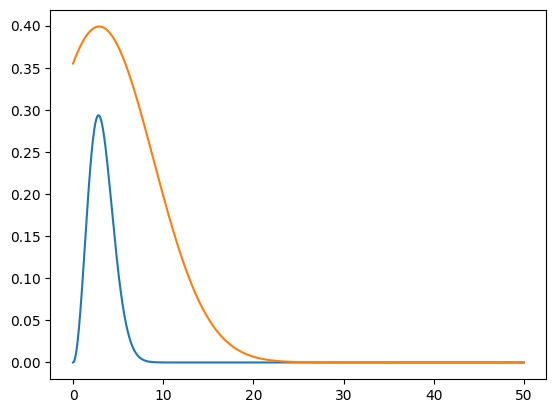

In [262]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy import stats

np.random.seed(42)

mu = 2.9
std = 6
M = 6
def p(theta):
    return np.sqrt(2/np.pi) * ((theta**2 * np.exp(-theta**2 / 8)) / 8)

# proposal PDF
def q(x):
    return stats.norm.pdf(x, loc=mu, scale=std)

# proposal RNG
def q_rand():
    return np.random.normal(loc=mu, scale=std)

# x = np.linspace(0, 50, 1000)
# plt.plot(x, p(x))
# plt.plot(x, M*q(x))

# Samples N values from the q distribution
def rejection_sample_V(N):
    theta_samples = []
    for _ in range(N):
        proposal = q_rand()
        u = np.random.uniform(0, 1)
        if (u*M*q(proposal) <= p(proposal)):
            theta_samples.append(proposal**2)

    return np.array(theta_samples)

V = np.mean(rejection_sample_V(100000))
print(f'V = E(theta^2)={np.mean(V)}')

Vs = [np.mean(np.mean(rejection_sample_V(100000))) for _ in range(30)]
std_error = np.std(Vs) / np.sqrt(len(Vs))

print(f'Mean estimate of V={np.mean(Vs)} with std-error={std_error}')
confidence_interval = (np.mean(Vs) - 2*std_error, np.mean(Vs) + 2*std_error)

#### Write your numerical answer below and its 95% confidence interval

In [263]:
v_value = V # do not hard-code the number: assign the variable used in your previous computations
print('V: {}'.format(v_value))

v_ci = confidence_interval # do not hard-code the number: assign the variable used in your previous computations
print('95% confidence interval: {}'.format(v_ci))

V: 12.008689908865586
95% confidence interval: (12.018896107064654, 12.067378844166646)


## Justification :
First I have plotted the target distribution pi(theta). Noticing it is somwhat similar to a normal distribution I decided that a rejection sampling scheme can work nicely here.

Next, I plotted both the target and a normal pdf side-to-side to find good arguments for the scale, loc and M by visual trial and error.
After finding good enough values that also provide 30% acceptence rate I started increasing the iteration after getting a stable enough result with a low std-error.

`Rejection sampling` At this method, samples are accepted with a probability proportional to the target/proposal distribution. This ensures that regions of higher probability are sampled more frequently. A proposal distribution is choesn to be similar to the target. This helps to get better acceptence rate. If our M is correct and indeed covers the entire target function, after enough iterations theory suggest it will converge to the desired probability distribution.



---

## OPTIONAL PROBLEMS: CHOOSE 2 OUT OF 3
---

Please note that answering all three problems will not give you extra points.

However, if you decide to return three problems, the problem with the lowest score out of the three will be discarded.

## 4. Resampling for automatic testing of exercise solutions

A teacher of a course in computational statistics is developing exercises for the students. The exercises are checked by an automated system that can be set to accept answers falling to a specified interval $[l, u]$. The exercises involve randomness so the lecturer cannot be certain what values the students will get. The teacher wants to set up the system so that it will accept the solutions obtained by the students after running a given number of iterations with a high probability.

In one specific exercise task, the students are studying the bootstrap confidence intervals of the *skewness* of a set of $N$ numbers $X = \{ x_1, \dots, x_N \}$. For more information about the skewness of a distribution, see [here](https://en.wikipedia.org/wiki/Skewness) (but details are not needed for this problem). 

Roughly speaking, negative skewness indicates that the left tail of a distribution contains more mass than the right one, and vice versa for positive skewness. Finally, zero skewness means that both tails are evenly balanced. It is often used to indicate deviation from Gaussianity, since any symmetric distribution like the normal has zero skewness.

The students are told to use the following estimator of the skewness:

$$\textrm{Skew}[X] = \frac{\mu_3}{s^3}  = \frac{ \frac{1}{N} \sum_{n=1}^N (x_n - \mu)^3}{\left( \frac{1}{N - 1}\sum_{n=1}^N (x_n - \mu)^2\right)^{3/2}},
\quad \text{where } \mu = \frac{1}{N} \sum_{n=1}^N x_n.$$
The students' task is to draw 1000 bootstrap samples and estimate the central 95% confidence interval of the skewness from the samples.

Your task is to develop a resampling method the teacher could use to accurately estimate central 95% confidence intervals for the end points of the confidence intervals the students will obtain from their simulation. The teacher has limited computational resources and the data set is big, so she can only estimate $\textrm{Skew}$ for at most 10000 bootstrapped sets of the original data similar to the ones the students are using, but can perform futher computation on scalar values computed from these sets.

1. Implement the student bootstrap solution. What is the confidence interval you obtain for the data set loaded below?
2. Independently of your solution above, implement the teacher checker. Remember to respect the limits on computation but try to find the most accurate possible solution within these limits. Test your solution on the data set loaded below and report the confidence intervals obtained for the lower and upper ends of the confidence intervals obtained by the students.

Remember to briefly explain the outline of your solution and to justify why it works.

You may use basic `numpy`, `numpy.random`, `matplotlib` and `pandas` functions for the task.

In [ ]:
import pandas as pd
import numpy as np
import numpy.random as npr

p2_data = pd.read_csv('https://raw.githubusercontent.com/lacerbi/compstats-files/main/data/toydata2.txt', header=None).values[:,0]
print(np.mean(p2_data), np.std(p2_data))

3.9695260800000005 1.4482060147882945


#### Write your numerical answer to part 1 below: what's the 95% confidence interval?

In [ ]:
skew_ci = np.nan * np.ones(2) # do not hard-code the number: assign the variable used in your previous computations
print('95% confidence interval (student''s task): {}'.format(skew_ci))

95% confidence interval (students task): [nan nan]


#### Write your numerical answer to part 2 below: what are the 95% confidence intervals for the lower and upper confidence intervals obtained by the students?

In [ ]:
skew_lower_ci_ci = np.nan * np.ones(2) # do not hard-code the number: assign the variables used in your previous computations
skew_upper_ci_ci = np.nan * np.ones(2) # do not hard-code the number: assign the variables used in your previous computations

print('95% confidence interval on lower confidence interval: {}'.format(skew_lower_ci_ci))
print('95% confidence interval on upper confidence interval: {}'.format(skew_upper_ci_ci))

95% confidence interval on lower confidence interval: [nan nan]
95% confidence interval on upper confidence interval: [nan nan]


### Your textual answer explaining your solutions:

*Replace this with your answer*.

## 5. MCMC sampling and convergence

Implement a random walk Metropolis-Hastings MCMC sampler for the following model. Tune your sampler to work efficiently, and briefly justify and explain how you did this. Carefully check the convergence of your sampler and briefly justify and explain how you did this.

As our model we will consider a logistic regression model fitted to the observations $((\boldsymbol{x}_1, y_1), (\boldsymbol{x}_2, y_2), \dots, (\boldsymbol{x}_N, y_N))$. The code below will load the matrix $\boldsymbol{x}$ (each row is one sample) and vector $\boldsymbol{y}$.

The values $\boldsymbol{x}_1, \dots, \boldsymbol{x}_N$ are the *input values* and $y_1, \dots, y_N$ are the binary *target values*.

The data set comes from the Framingham Heart Study. The target variable (HAS_CHD) indicates whether the subject was diagnosed with heart disease. The input variables are in order:
  1. systolic blood pressure (SBP),
  2. diastolic blood pressure (DBP),
  3. number of cigarettes smoked per day (CIG), and 
  4. age (AGE).

The loading code normalises these to have zero mean and standard deviation $1/2$ to get the regression coefficients to a shared scale.

The logistic regression model is defined with the help of a logistic link function
$$ h_{\beta_0, \boldsymbol{\beta}}(\boldsymbol{x}_n) = \frac{1}{1 + e^{-(\beta_0 + x_{n1} \beta_1 + \dots + x_{n4} \beta_4})}, $$
where $\beta_0$ is the intercept of the model and $\boldsymbol{\beta} = (\beta_1, \dots, \beta_4)$ are the regression coefficients.
The likelihood of the model is
$$ p(\boldsymbol{y} \mid \boldsymbol{x}, \beta_0, \boldsymbol{\beta}) = \prod_{n=1}^N h_{\beta_0,\boldsymbol{\beta}}(\boldsymbol{x}_n)^{y_n} (1 - h_{\beta_0,\boldsymbol{\beta}}(\boldsymbol{x}_n))^{(1-y_n)}. $$

The regression weights $\beta_0$ and $\boldsymbol{\beta}$ have the hierarchical prior
$$ p(\beta_j) = \mathcal{N}(\beta_j;\; 0, \sigma_{\beta}^2), \quad j = 0, 1, \dots, 4, $$
where $\sigma_{\beta}$ is the standard deviation of the prior of $\beta_j$ with the prior 
$$ p(\sigma_{\beta}) = \chi^2(df = 1), $$ 
a chi-squared distribution with degrees of freedom $df=1$.


The full set of model parameters to infer is thus $\theta = (\sigma_{\beta}, \beta_0, \beta_1, \dots, \beta_4)$. Note that $\sigma_{\beta} > 0$, while $\beta_0, \beta_1, \ldots, \beta_4 \in (-\infty, \infty)$.

Write an MCMC sampler to sample from the joint posterior distribution $p(\theta \mid \boldsymbol{x}, \boldsymbol{y}) = p(\sigma_{\beta}, \beta_0, \beta_1, \dots, \beta_4 \mid \boldsymbol{x}, \boldsymbol{y})$ of all model parameters $\theta$.
Compute and print the posterior medians as well as 25% and 75% quantiles of the marginal posteriors of each parameter (also known as interquartile range).
Plot scatter plots with 1000 representative points from the pairwise marginal distributions of all pairs of parameters. Are some pairs of parameters unusually strongly correlated?

You may use `numpy`, `numpy.random`, `pandas`, `scipy.special`, `scipy.stats` and `matplotlib` functions for the task.

*Hint*: You can use `scipy.stats.chi2` for the chi-squared distribution.


sigma_beta R_roof=1.1440355755895288
beta0 R_roof=1.0012701286645471
beta1 R_roof=1.0163053825327546
beta2 R_roof=1.014908321440997
beta3 R_roof=1.0116074938960662
beta4 R_roof=1.0044411127578166


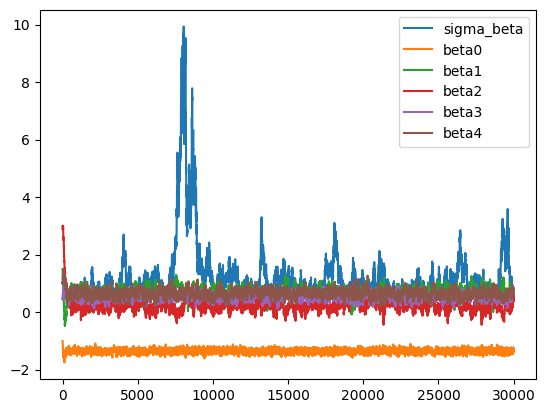

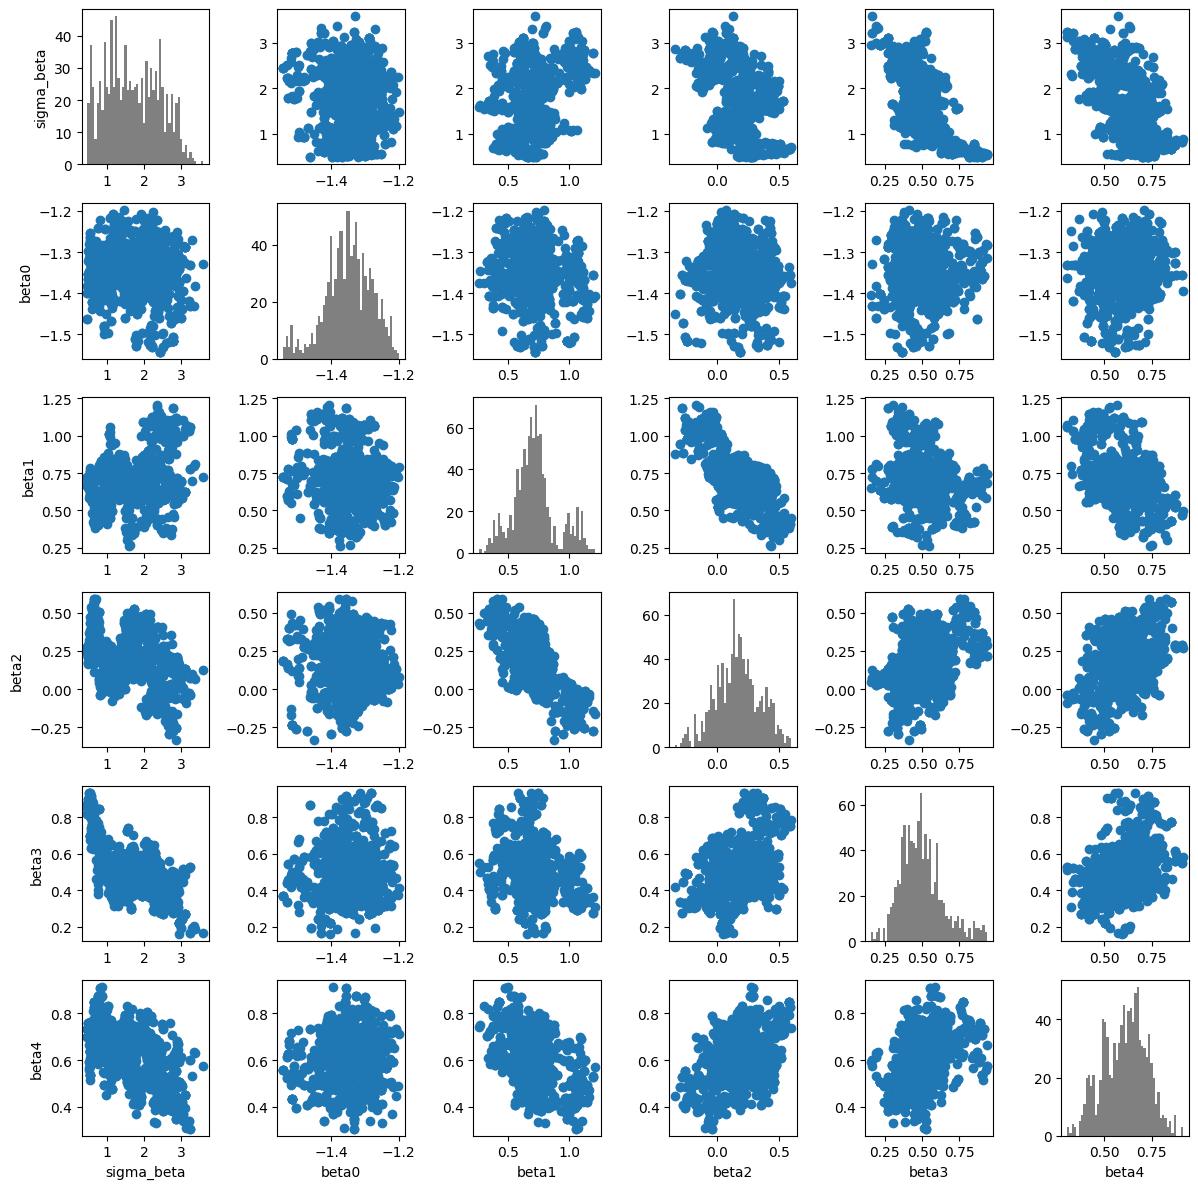

In [274]:
%matplotlib inline
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm
from scipy.special import expit

heart_data = pd.read_csv('./heart_data.txt', sep='\t')
# Extract input variables
p4_x = heart_data[['SBP', 'DBP', 'CIG', 'AGE']].values.astype(float)
# Extract target variable
p4_y = heart_data['HAS_CHD'].values.astype(float)
# Remove mean from inputs
p4_x -= np.mean(p4_x, 0)
# Standardise input variance
p4_x /= 2*np.std(p4_x, 0)

np.random.seed(1)

def logistic(x, beta0, beta):
    return 1 / (1 + np.exp(-beta0 - np.dot(x, beta)))

def log_likelihood(beta0, beta, x, y):
    h = logistic(x, beta0, beta)

    return np.sum(np.log(h**y * (1-h)**(1-y)))

def log_prior(beta0, beta, log_sigma_beta):
    sigma_beta = np.exp(log_sigma_beta) 

    beta_log_prior = np.log(norm.pdf(beta0, 0, sigma_beta)) + np.sum(np.log(norm.pdf(beta, 0, sigma_beta)))
    sigma_prior = chi2.pdf(sigma_beta, df=1) + sigma_beta
    return beta_log_prior + np.log(sigma_prior)

def log_posterior(beta0, beta, log_sigma_beta, x, y):
    return log_likelihood(beta0, beta, x, y) + log_prior(beta0, beta, log_sigma_beta)

def proposal(current):
    return np.random.multivariate_normal(current, 0.002*np.eye(len(current)))

# The actual MCMC run for N samples
def mcmc(initial, N, x, y):
    current = initial
    samples = [current]
    accept_count = 0
    
    for i in range(N):
        proposed = proposal(current)
        p_log_sigma_beta = proposed[0]
        p_beta0 = proposed[1]
        p_beta = proposed[2:6]

        log_sigma_beta = current[0]
        beta0 = current[1]
        beta = current[2:6]

        a = log_posterior(p_beta0, p_beta , p_log_sigma_beta, x, y) - log_posterior(beta0, beta, log_sigma_beta, x, y)
        
        if np.random.rand() < np.exp(a):
            current = proposed
            accept_count+=1
        
        samples.append(current)
    
    # Transform sigma back
    samples = np.array(samples)
    samples[:,0] = np.exp(samples[:,0])

    return samples

initial = np.array([0, -1, 1.5, 3, 0.5, 1]) # [sigma_beta, beta0, beta1, beta2, beta3, beta4]
chains = []
parameter_names = ['sigma_beta', 'beta0', 'beta1', 'beta2', 'beta3', 'beta4']

# Calculate R-roof and print it for each parameter
def get_R_roof():
    for _ in range(5):
        samples = mcmc(initial, 10000, p4_x, p4_y)

        # Remove warm-up samples
        samples = samples[len(samples)//2:]
        chains.append(samples)
    
    def R_roof(chains: list[list[float]]):
        n = len(chains[0])
        m = len(chains)

        theta_dot_dot = (1/m) * np.sum([np.mean(chains[j]) for j in range(0, m)])

        B = (n/(m-1)) * np.sum([(np.mean(chains[j]) - theta_dot_dot)**2 for j in range(0, m)])
        W = (1/(m*(n-1))) * np.sum([(chains[j] - np.mean(chains[j]))**2 for j in range(0, m)])
        var_theta = ((n - 1) / n)*W + B/n

        return np.sqrt(var_theta/W)

    for i in range(len(parameter_names)):
        one_param_chains = [samples[:,i] for samples in chains]
        print(f'{parameter_names[i]} R_roof={R_roof(one_param_chains)}')

get_R_roof()

def plot(samples: list[float]):
    for i in range(len(samples[0])):
        plt.plot(np.arange(len(samples)), samples[:,i], label=parameter_names[i])

    plt.legend()

    samples_subset = samples[-1000:]
    n = len(samples_subset[0])
    fig, ax = plt.subplots(n, n, figsize=(n*2, n*2))

    for i in range(n):
        for j in range(n):
            if i == j:
                ax[i, j].hist(samples_subset[:, i], bins=50, color='gray')
            else:
                ax[i, j].scatter(samples_subset[:, j], samples_subset[:, i])
            
            if i == n - 1:
                ax[i, j].set_xlabel(parameter_names[j])
            if j == 0:
                ax[i, j].set_ylabel(parameter_names[i])

    plt.tight_layout()
    plt.show()

samples = mcmc(initial, 30000, p4_x, p4_y)

plot(samples)


#### Write your numerical answers below:

In [272]:
means = np.mean(samples, axis=0)

posterior_median = means # do not hard-code the number: assign the variables used in your previous computations
posterior_lower = np.percentile(samples, 25, axis=0) # do not hard-code the number: assign the variables used in your previous computations
posterior_upper =  np.percentile(samples, 75, axis=0) # do not hard-code the number: assign the variables used in your previous computations

print('Posterior medians (50% quantiles): {}'.format(posterior_median))
print('Posterior 25% quantiles: {}'.format(posterior_lower))
print('Posterior 75% quantiles: {}'.format(posterior_upper))

Posterior medians (50% quantiles): [ 1.10378738 -1.35062073  0.65422479  0.25402617  0.54489225  0.63956511]
Posterior 25% quantiles: [ 0.74325313 -1.3975423   0.51169223  0.10136971  0.46050099  0.54689224]
Posterior 75% quantiles: [ 1.31187592 -1.30326809  0.80249353  0.39551172  0.631479    0.7311687 ]


### Justification/explanation for tuning of the sampler:

I tuned the covariance of the proposal until I got a good acceptance rate. The normal distribution seems to be good as well for a proposal.

Then we can also see from the scatter plots that beta1 and beta2 are correlated very nicely. Some of the others show correlation as well, while the former (beta1 beta2) show the most "linear".

### Justification/explanation for the convergence checking:

By plotting all the coefficients, also from different initial points - the plot "stablised"
Then checking the R_roof metric for each of the variables, it is very close to 1 and bloe the eccepted threshold of 1.1

## 6. Variational inference of a multivariate mixture distribution

In this exercise you are asked to use variational inference to approximate a target density $p(\boldsymbol{\theta})$ with a variational approximation $q(\boldsymbol{\theta})$, with $\boldsymbol{\theta} = (\theta_1, \theta_2) \in \mathbb{R}^2$.

The target density is a mixture of $K = 4$ products of shifted (or non-standardized) Students' t distributions (each dimension of a mixture component has an independent shifted Student's t) defined as follows:
$$
p(\boldsymbol{\theta}; \boldsymbol{\mu}_1, \ldots, \boldsymbol{\mu}_K, \boldsymbol{\nu}, \boldsymbol{w}) = \sum_{k=1}^K w_k \prod_{d=1}^2 t_{\nu_{k}}\left(\theta_d; \mu_{k,d} \right)
$$
where $\nu_k$ are degrees of freedom for each component, $\mu_{k,d}$ are the location parameters for each shift, and the mixture parameters are the following:
- $\boldsymbol{\mu}_1 = (-4, 2)$, $\boldsymbol{\mu}_2 = (-2, -3.5)$, $\boldsymbol{\mu}_3 = (0, 0)$, $\boldsymbol{\mu}_4 = (3, 4)$
- $\boldsymbol{\nu} = (4,4,3,30)$
- $\boldsymbol{w} = (0.3,0.3,0.1,0.3)$

As variational distribution we will use a product of independent distributions,

$$q(\boldsymbol{\theta}) = q(\theta_1) \cdot q(\theta_2)$$

where  $q(\theta_1)$ and $q(\theta_2)$ are normal distributions. Fit the variational approximation $q(\boldsymbol{\theta})$ to the density $p(\boldsymbol{\theta})$. Please note that the independence assumption above is equivalent to saying that $q(\boldsymbol{\theta})$ is a multivariate normal with diagonal covariance matrix $\boldsymbol{\Sigma}$.

For the best variational solution you find (according to the ELBO), report the means and standard deviations of $q(\theta_1)$ and $q(\theta_2)$ and its ELBO. Describe how you validated your results and discuss your observations.

You may use `numpy`, `numpy.random`, `scipy.special`, `scipy.stats`, `matplotlib` functions for the task, and any linear algebra function you may need (e.g., `numpy.linalg`). You may use `autograd` and `torch`.

*Hint*: Use the formula of the ELBO found in section 0 of the Lecture 11 class tasks.

#### Write your numerical answers below:

In [ ]:
vp_means = np.nan * np.ones(2) # do not hard-code the number: assign the variables used in your previous computations
vp_stds = np.nan * np.ones(2) # do not hard-code the number: assign the variables used in your previous computations
best_elbo = np.nan # do not hard-code the number: assign the variables used in your previous computations

print('Variational posterior means: {}'.format(vp_means))
print('Variational posterior standard deviations: {}'.format(vp_stds))
print('ELBO of best solution: {}'.format(best_elbo))

Variational posterior means: [nan nan]
Variational posterior standard deviations: [nan nan]
ELBO of best solution: nan


### Your textual answer explaining your solution:

*Replace this with your answer*.